<a href="https://colab.research.google.com/github/EstebanFTellezR/Modelaci-n-y-aja/blob/main/Support_Vector_Machine_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Classifier: Intuition

### Es un algoritmo de aprendizaje supervisado, cuyo objetivo es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos; propuesto por Vladimir Vapnik.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from scipy.stats import randint, uniform
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

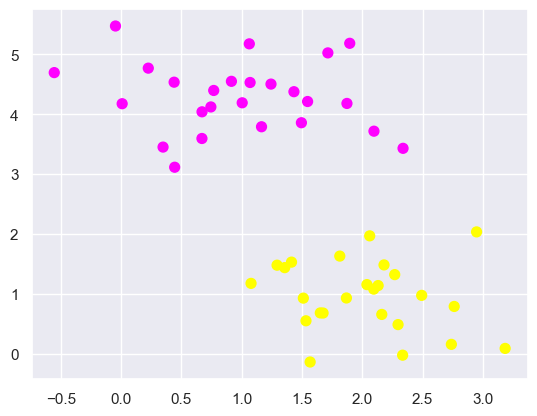

In [ ]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

(-1.0, 3.5)

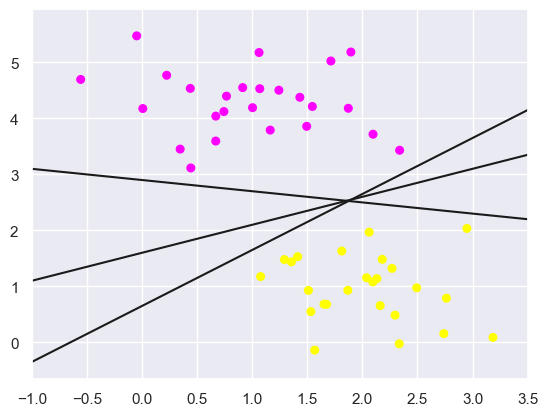

In [ ]:
xfit = np.linspace(-1, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

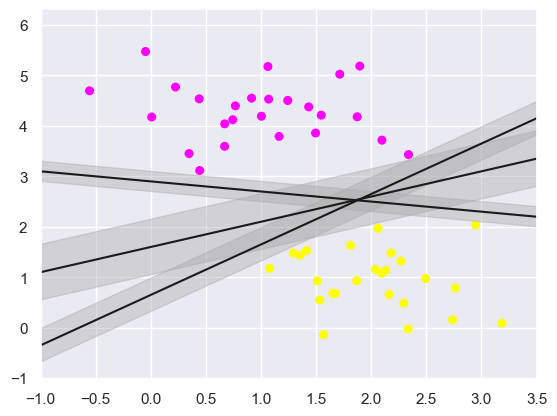

In [ ]:
xfit = np.linspace(-1, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

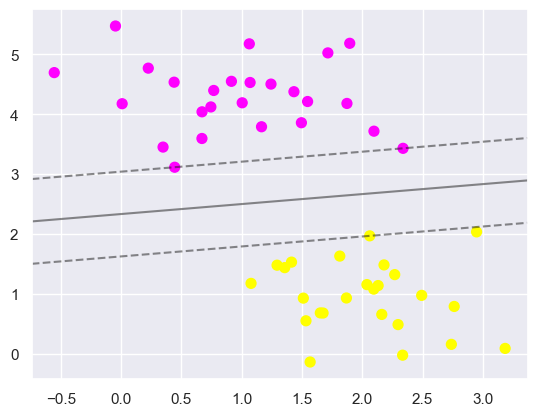

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

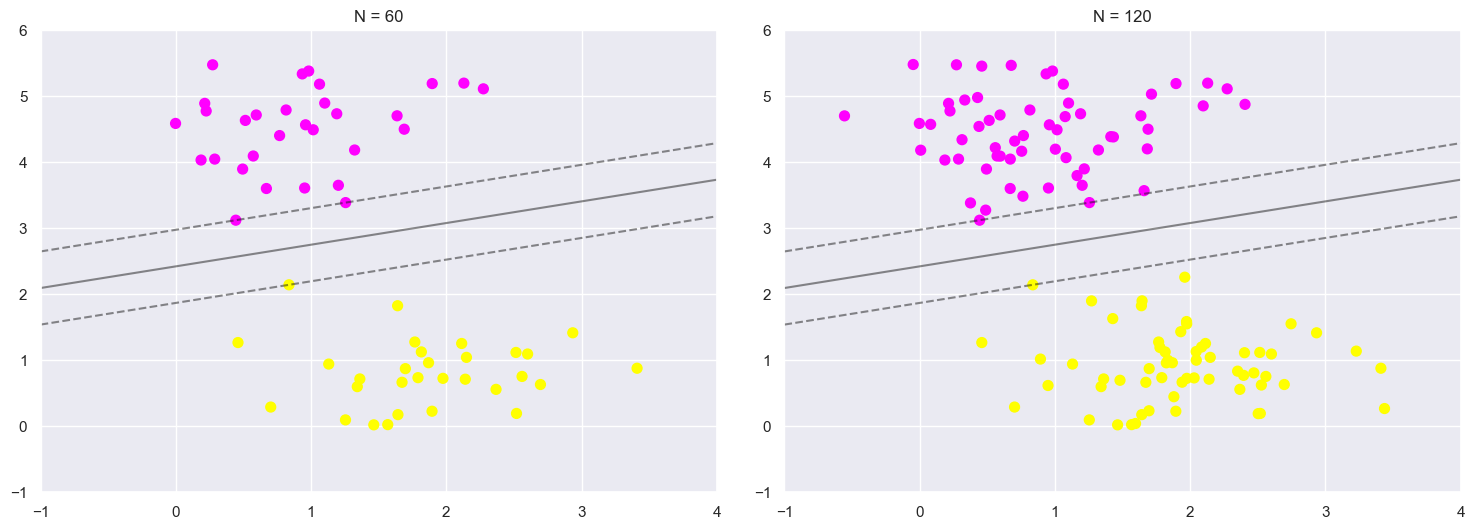

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 150, 200), value=10), Output()), _dom_cl…

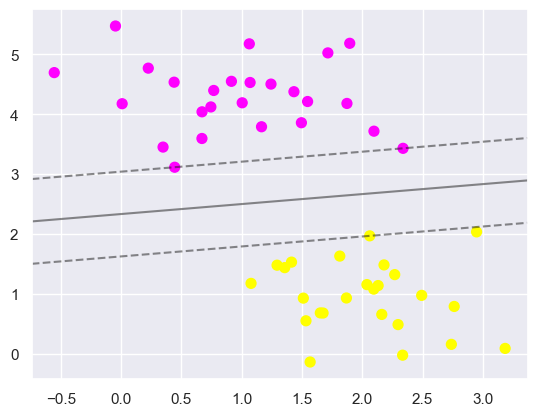

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

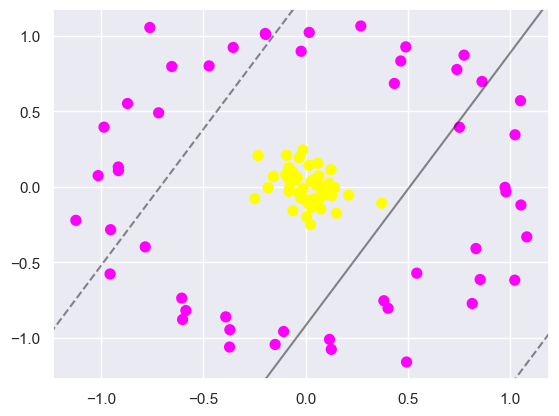

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

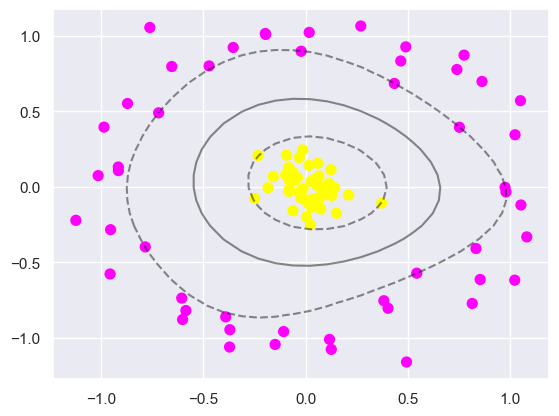

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

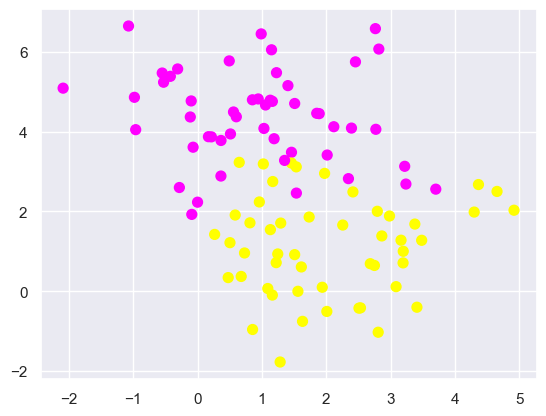

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

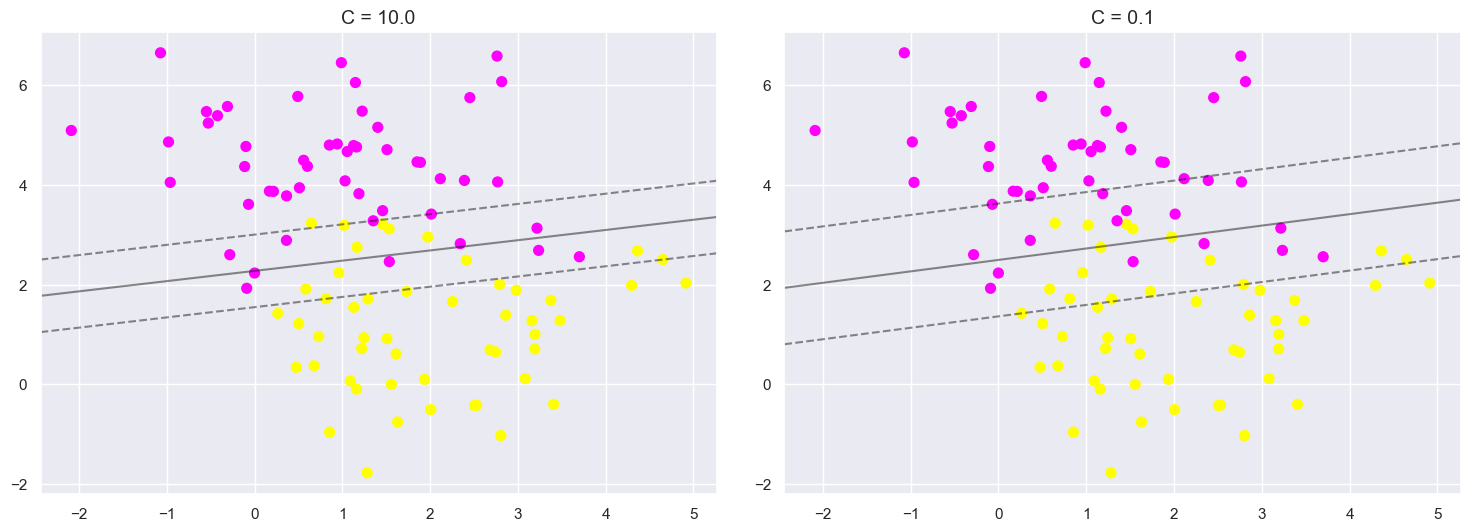

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
rng = np.random.RandomState(123)

r1 = rng.uniform(0, 1, 50)
r2 = rng.uniform(1.25, 2.5, 50)

t1 = rng.uniform(0, 360, 50)
t2 = rng.uniform(0, 360, 50)

x1 = r1 * np.sin(t1)
x2 = r2 * np.sin(t2)
y1 = r1 * np.cos(t1)
y2 = r2 * np.cos(t2)

[Text(0.5, 0, '$r$'),
 (-0.25, 3.0),
 Text(0, 0.5, '$\\theta$'),
 (0.0, 360.0),
 Text(0.5, 1.0, 'Coordenadas Polares')]

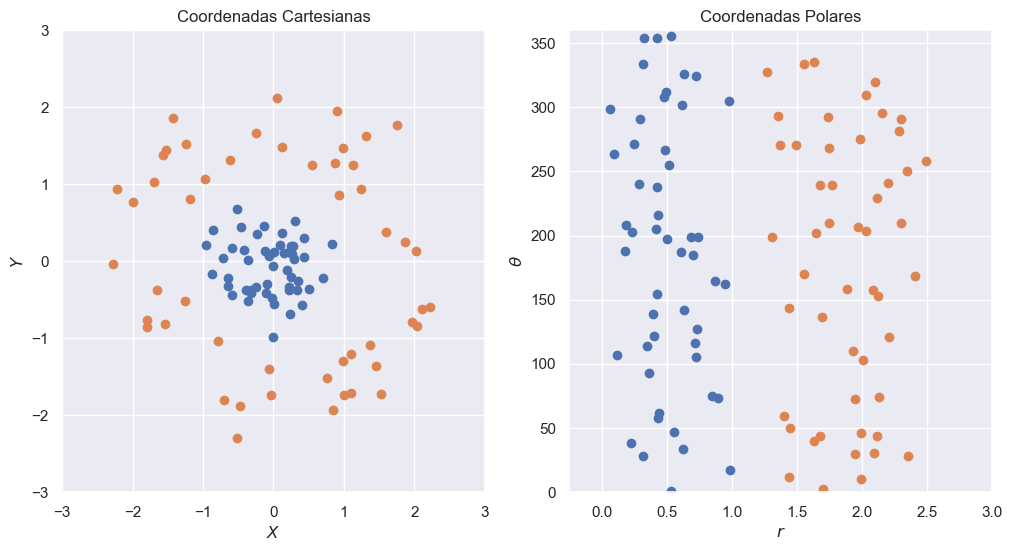

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6.0), nrows=1, ncols=2, sharex=False)
adj = plt.subplots_adjust(hspace=0.5)

axs[0].scatter(x1, y1)
axs[0].scatter(x2, y2)
axs[0].set(xlabel=r'$X$', xlim=(-3, 3),
           ylabel=r'$Y$', ylim=(-3, 3),
           title='Coordenadas Cartesianas')

axs[1].scatter(r1, t1)
axs[1].scatter(r2, t2)
axs[1].set(xlabel=r'$r$', xlim=(-0.25, 3),
           ylabel=r'$\theta$', ylim=(0, 360),
           title='Coordenadas Polares')

In [ ]:
def tuneAndTest(model, params):
    rnd_search = RandomizedSearchCV(model, param_distributions =params, n_iter = 50, cv = 5, random_state=40)
    rnd_search.fit(X_train, y_train)
    print("best hyper-parameter value: ", rnd_search.best_params_)
    bestmodel = rnd_search.best_estimator_

    prediction = bestmodel.predict(X_test)
    print("confusion matrix:", confusion_matrix(y_test, prediction))
    print("recall:",recall_score(y_test, prediction))
    print("precision:",precision_score(y_test, prediction))
    plot_svm(bestmodel, X_train, y_train)
    print("\n")

In [ ]:
def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_mesh).reshape(x0.shape)
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"", fontsize=20)
    plt.ylabel(r"", fontsize=20, rotation=0)

In [ ]:
X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

best hyper-parameter value:  {'C': 8.153740561605723}
confusion matrix: [[34 11]
 [ 5 50]]
recall: 0.9090909090909091
precision: 0.819672131147541




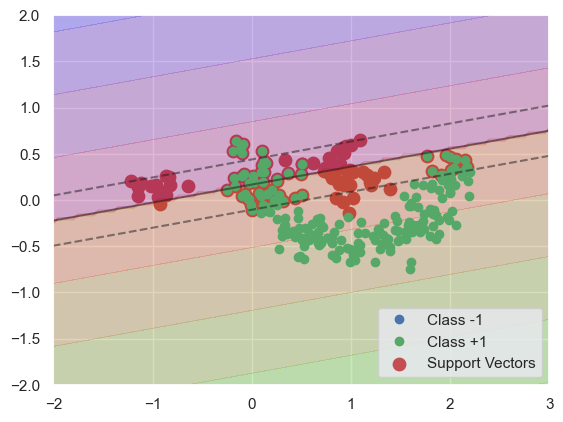

In [ ]:
tuneAndTest(SVC(kernel="linear"),{"C": uniform(0,20)})

best hyper-parameter value:  {'C': 7.826529617851785, 'coef0': 3, 'degree': 3, 'gamma': 0.6095896671142067}
confusion matrix: [[42  3]
 [ 0 55]]
recall: 1.0
precision: 0.9482758620689655




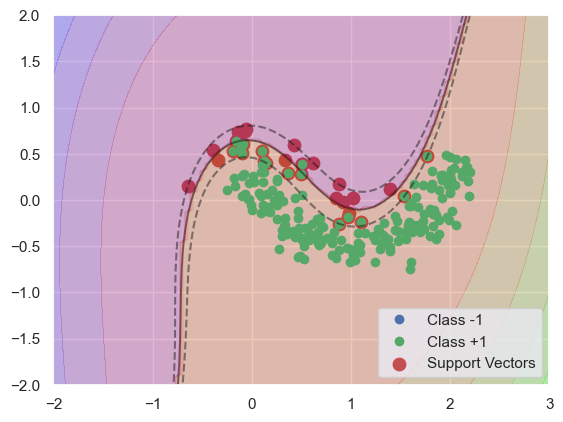

In [ ]:
tuneAndTest(SVC(kernel="poly"),{"coef0":randint(low=0, high=5),"C": uniform(0,20),"degree": randint(low=2, high=5), "gamma":uniform(0, 1)})

best hyper-parameter value:  {'C': 10.527990485942908, 'gamma': 0.6238122128846867}
confusion matrix: [[42  3]
 [ 0 55]]
recall: 1.0
precision: 0.9482758620689655




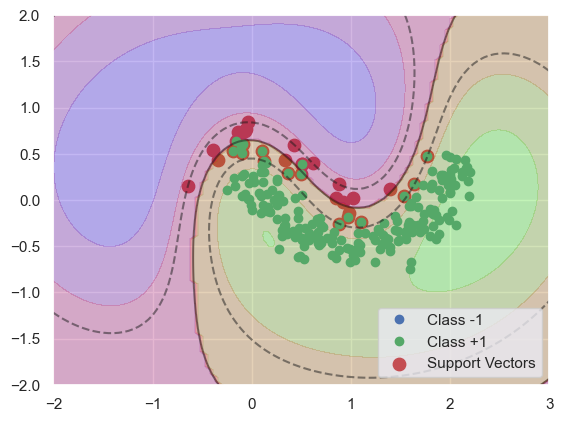

In [ ]:
tuneAndTest(SVC(kernel="rbf"),{"C": uniform(0,20), "gamma":uniform(0, 1)})